
MCM 2021
Murder Hornets

In [4]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

In [43]:
df = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.csv')
# df_images = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCM_ProblemC_ Images_by_GlobalID.csv')
    
df_positive = df.loc[df['Lab Status'] == 'Positive ID']
df_negative = df.loc[df['Lab Status'] == 'Negative ID']
df_unprocessed = df.loc[df['Lab Status'] == 'Unprocessed']
df_unverified = df.loc[df['Lab Status'] == 'Unverified']

num_pos = len(df_positive)
num_neg = len(df_negative)
num_unproc = len(df_unprocessed)

df_temp = (df[df['Lab Status']!='Unprocessed'])
df_train = df_temp[df_temp['Lab Status'] != 'Unverified'] # Remove unprocessed or unverified data

# df_train = df_negative
# df_temp = (df[df['Lab Status']!='Positive ID'])
df_valid = df_unprocessed

In [44]:
df_train['Notes']

0       One dead wasp seen in Blaine, and suspect flyi...
1                             Hornet specimen sent to WSU
3       This was the colony that was found and destroy...
6       I’m not sure what this is, but it was the bigg...
8       slow moving, i have this in the freezer still ...
                              ...                        
4412       Super fast and kept banging in my sliding door
4419    I was walking on the selah cliffs trail and fo...
4420                           Flew away towards the west
4421    This insect was large enough to trigger home s...
4423                                                     
Name: Notes, Length: 2083, dtype: object

In [41]:
print(len(df_negative)+len(df_positive)+len(df_unprocessed)+len(df_unverified))

4440


In [42]:
len(df_unverified)

2342

In [28]:
df_positive.columns

Index(['GlobalID', 'Detection Date', 'Notes', 'Lab Status', 'Lab Comments',
       'Submission Date', 'Latitude', 'Longitude'],
      dtype='object')

In [29]:
df_train.index

Int64Index([   0,    1,    3,    6,    8,    9,   12,   14,   18,   19,
            ...
            4395, 4400, 4405, 4408, 4409, 4412, 4419, 4420, 4421, 4423],
           dtype='int64', length=2083)

In [38]:
# df_positive['Notes']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

count_vect = CountVectorizer()


In [31]:
# print(X_train_pos_counts)
# print(X_train_neg_counts)

In [32]:

# print(df_train)

In [45]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')),\
                      ('tfidf', TfidfTransformer()),\
                      ('clf-svm', SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3,\
                            max_iter=10, random_state=42)),\
                        ])
text_clf_svm = text_clf_svm.fit(df_train['Notes'], df_train['Lab Status'])

In [34]:


### TRAINING TEST
predicted_svm = text_clf_svm.predict(df_train['Notes'])
# print(predicted_svm.shape)
percent_correct = np.mean(predicted_svm == df_train['Lab Status'])
print(percent_correct)


0.9932789246279404


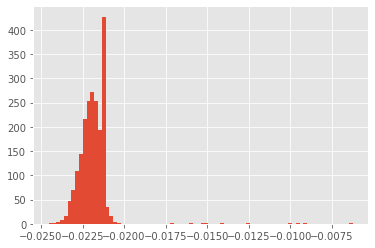

In [35]:


### Calculate confidence
confidence = text_clf_svm.decision_function(df_train['Notes'])
# print(confidence)
# print(type(confidence))
norm = np.linalg.norm(confidence)
normalized_conf = confidence/norm
# print(normalized_conf)
# print(len(df_train))
# print(confidence.shape)
plt.hist(normalized_conf, bins=80, stacked=True)
plt.show()

In [36]:
confidence

array([-0.77593618, -0.73095734, -0.60337299, ..., -1.07409041,
       -1.12416086, -1.0262919 ])

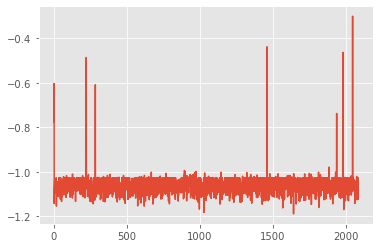

In [180]:
plt.plot(np.linspace(0,len(confidence),len(confidence)), confidence)
plt.show()

In [170]:
confidence

array([-0.77593618, -0.73095734, -0.60337299, ..., -1.07409041,
       -1.12416086, -1.0262919 ])

['Negative ID' 'Negative ID' 'Negative ID' 'Negative ID' 'Negative ID'
 'Negative ID' 'Negative ID' 'Negative ID' 'Negative ID' 'Negative ID'
 'Negative ID' 'Negative ID' 'Negative ID' 'Negative ID' 'Negative ID']


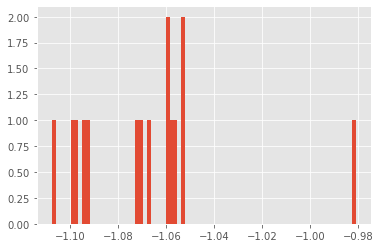

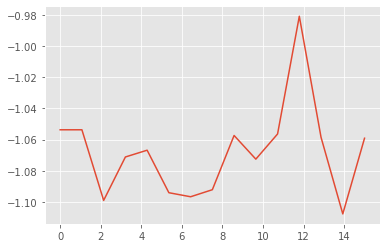

In [76]:
### VALIDATION
predicted_svm_valid = text_clf_svm.predict(df_valid['Notes'])
print(predicted_svm_valid)
### Calculate confidence
confidence_valid = text_clf_svm.decision_function(df_valid['Notes'])
# print(confidence)
plt.hist(confidence_valid, bins=80, stacked=True)
plt.show()
plt.plot(np.linspace(0,len(confidence_valid),len(confidence_valid)), confidence_valid)
plt.show()

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_svc = Pipeline([('vect', CountVectorizer(stop_words='english')),\
                      ('tfidf', TfidfTransformer()),\
                      ('clf-svm', SVC(gamma='auto', probability=True)),\
                        ])
clf_svc = clf_svc.fit(df_train['Notes'], df_train['Lab Status'])

predicted_svc = clf_svc.predict(df_train['Notes'])
percent_correct = np.mean(predicted_svm == df_train['Lab Status'])
print(percent_correct)
prob_svc = clf_svc.predict_proba(df_train['Notes'])
# print(prob_svc)


0.9932789246279404


In [125]:
df_train['Lab Status']

0       Positive ID
1       Positive ID
3       Positive ID
6       Negative ID
8       Negative ID
           ...     
4412    Negative ID
4419    Negative ID
4420    Negative ID
4421    Negative ID
4423    Negative ID
Name: Lab Status, Length: 2083, dtype: object

In [166]:
errors = 0
num = 0
for i in df_train.index:
    # print(entry)
    if predicted_svc[num] != df_train['Lab Status'][i]:
        
        print(i, predicted_svc[num], df_train['Lab Status'][i])
        print("probability=", prob_svc[num])
        errors+=1
    num+=1
print(errors)

0 Negative ID Positive ID
probability= [0.77010048 0.22989952]
1 Negative ID Positive ID
probability= [0.40633538 0.59366462]
3 Negative ID Positive ID
probability= [0.07573132 0.92426868]
834 Negative ID Positive ID
probability= [0.88566031 0.11433969]
924 Negative ID Positive ID
probability= [0.88566031 0.11433969]
956 Negative ID Positive ID
probability= [0.03568167 0.96431833]
1011 Negative ID Positive ID
probability= [0.88566031 0.11433969]
1069 Negative ID Positive ID
probability= [0.0748904 0.9251096]
3279 Negative ID Positive ID
probability= [0.01445794 0.98554206]
4127 Negative ID Positive ID
probability= [0.76339689 0.23660311]
4206 Negative ID Positive ID
probability= [0.69818408 0.30181592]
4207 Negative ID Positive ID
probability= [0.72083442 0.27916558]
4208 Negative ID Positive ID
probability= [0.01426586 0.98573414]
4338 Negative ID Positive ID
probability= [0.01771742 0.98228258]
14


In [168]:
print(predicted_svc)

['Negative ID' 'Negative ID' 'Negative ID' ... 'Negative ID' 'Negative ID'
 'Negative ID']


In [165]:
len(df_train)

2083

In [142]:
print(predicted_svc[2])

Negative ID


In [158]:
i=0
for d in df_train['Lab Status']:
    if d=='Positive ID':
        i+=1
print(i)

14


In [169]:
prob_svc[0:100]

array([[0.77010048, 0.22989952],
       [0.40633538, 0.59366462],
       [0.07573132, 0.92426868],
       [0.95559877, 0.04440123],
       [0.92775189, 0.07224811],
       [0.90838827, 0.09161173],
       [0.91021617, 0.08978383],
       [0.9042604 , 0.0957396 ],
       [0.90473516, 0.09526484],
       [0.9128673 , 0.0871327 ],
       [0.93672039, 0.06327961],
       [0.90158397, 0.09841603],
       [0.945761  , 0.054239  ],
       [0.88566031, 0.11433969],
       [0.92101282, 0.07898718],
       [0.86108451, 0.13891549],
       [0.88566031, 0.11433969],
       [0.92591587, 0.07408413],
       [0.99604559, 0.00395441],
       [0.90967224, 0.09032776],
       [0.97203857, 0.02796143],
       [0.90241203, 0.09758797],
       [0.90653241, 0.09346759],
       [0.9150484 , 0.0849516 ],
       [0.93732861, 0.06267139],
       [0.94038322, 0.05961678],
       [0.88920449, 0.11079551],
       [0.91470839, 0.08529161],
       [0.93832167, 0.06167833],
       [0.92182682, 0.07817318],
       [0.

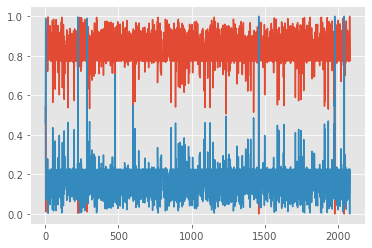

In [119]:
plt.plot(np.linspace(0,len(prob_svc),len(prob_svc)), prob_svc)
plt.show()